In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [27]:
w = 1.02                        # wheelbase
c = 0.08                        # trail
lamb = np.pi/10                 # steer axis tilt
g = 9.81                        # gravity

r_R = 0.3                       # rear wheel radius
m_R = 2                         # rear wheel mass
I_Rxx = 0.0603                  # rear wheel moment of inertia
I_Ryy = 0.12                    # rear wheel moment of inertia
I_Rzz = I_Rxx                   # rear wheel moment of inertia

x_B = 0.3                       # rear frame CoM longitudinal position
z_B = -0.9                      # rear frame CoM vertical position
m_B = 85                        # rear frame mass
I_Bxx = 9.2                     # rear frame moment of inertia
I_Byy = 11                      # rear frame moment of inertia
I_Bzz = 2.8                     # rear frame moment of inertia
I_Bxz = 2.4                     # rear frame product of inertia

x_H = 0.9                       # front frame CoM longitudinal position
z_H = -0.7                      # front frame CoM vertical position
m_H = 4                         # front frame mass
I_Hxx = 0.05892                 # front frame moment of inertia
I_Hyy = 0.06                    # front frame moment of inertia
I_Hzz = 0.00708                 # front frame moment of inertia
I_Hxz = -0.00756                # front frame product of inertia

r_F = 0.35                      # front wheel radius
m_F = 3                         # front wheel mass
I_Fxx = 0.1405                  # front wheel moment of inertia
I_Fyy = 0.28                    # front wheel moment of inertia
I_Fzz = I_Fxx                   # front wheel moment of inertia

In [28]:
m_T = m_R + m_B + m_H + m_F    
x_T = (x_B*m_B + x_H*m_H + w*m_F)/m_T
z_T = (-r_R*m_R + z_B*m_B + z_H*m_H - r_F*m_F)/m_T

I_Txx = I_Rxx + I_Bxx + I_Hxx + I_Fxx + m_R*r_R**2 + m_B*z_B**2 + m_H*z_H**2 + m_F*r_F**2
I_Txz = I_Bxz + I_Hxz - m_B*x_B*z_B - m_H*x_H*z_H + m_F*w*r_F
I_Tzz = I_Rzz + I_Bzz + I_Hzz + I_Fzz + m_B*x_B**2 + m_H*x_H**2 + m_F*w**2

m_A = m_H + m_F
x_A = (x_H*m_H + w*m_F)/m_A
z_A = (z_H*m_H - r_F*m_F)/m_A

I_Axx = I_Hxx + I_Fxx + m_H*(z_H - z_A)**2 + m_F*(r_F + z_A)**2
I_Axz = I_Hxz - m_H*(x_H - x_A)*(z_H - z_A) + m_F*(w - x_A)*(r_F + z_A)
I_Azz = I_Hzz + I_Fzz + m_H*(x_H - x_A)**2 + m_F*(w - x_A)**2

u_A = (x_A - w - c)*np.cos(lamb) - z_A*np.sin(lamb)

I_All = m_A*u_A**2 + I_Axx*np.sin(lamb)**2 + 2*I_Axz*np.cos(lamb)*np.sin(lamb) + I_Azz*np.cos(lamb)**2
I_Alx = -m_A*u_A*z_A + I_Axx*np.sin(lamb) + I_Axz*np.cos(lamb)
I_Alz = m_A*u_A*x_A + I_Axz*np.sin(lamb) + I_Azz*np.cos(lamb)

mu = (c/w)*np.cos(lamb) 
S_R = I_Ryy/r_R
S_F = I_Fyy/r_F
S_T = S_R + S_F
S_A = m_A*u_A + mu*m_T*x_T

In [29]:
M = np.zeros((2,2)); C = np.zeros((2,2)); K0 = np.zeros((2,2)); K2 = np.zeros((2,2))

M[0,0] = I_Txx
M[0,1] = I_Alx + mu*I_Txz
M[1,0] = M[0,1]
M[1,1] = I_All + 2*mu*I_Alz + mu**2*I_Tzz

C[0,0] = 0
C[0,1] = mu*S_T + S_F*np.cos(lamb) + (I_Txz/w)*np.cos(lamb) - mu*m_T*z_T
C[1,0] = -(mu*S_T + S_F*np.cos(lamb))
C[1,1] = (I_Alz/w)*np.cos(lamb) + mu*(S_A + (I_Tzz/w)*np.cos(lamb))

K0[0,0] = m_T*z_T
K0[0,1] = -S_A
K0[1,0] = K0[0,1]
K0[1,1] = -S_A*np.sin(lamb)

K2[0,1] = ((S_T - m_T*z_T)/w)*np.cos(lamb)
K2[1,1] = ((S_A + S_F*np.sin(lamb))/w)*np.cos(lamb)

print('M =', M)
print('\n')
print('C =', C)
print('\n')
print('K0 =', K0)
print('\n')
print('K2 =', K2)

M = [[80.81722     2.31941332]
 [ 2.31941332  0.29784188]]


C = [[ 0.         33.86641391]
 [-0.85035641  1.68540397]]


K0 = [[-80.95        -2.59951685]
 [ -2.59951685  -0.80329488]]


K2 = [[ 0.         76.5973459 ]
 [ 0.          2.65431524]]


Eigenvalues for v=0.0: [ 5.53094372+0.j  3.13164325+0.j -5.53094372+0.j -3.13164325+0.j]
Eigenvalues for v=0.01: [ 5.5138272 +0.j  3.13280692+0.j -5.54800607+0.j -3.13053193+0.j]
Eigenvalues for v=0.02: [ 5.49665498+0.j  3.13402447+0.j -5.56501572+0.j -3.12947149+0.j]
Eigenvalues for v=0.03: [ 5.47942548+0.j  3.13529748+0.j -5.58197411+0.j -3.1284605 +0.j]
Eigenvalues for v=0.04: [ 5.46213707+0.j  3.13662759+0.j -5.5988826 +0.j -3.12749758+0.j]
Eigenvalues for v=0.05: [ 5.44478805+0.j  3.13801647+0.j -5.61574254+0.j -3.12658139+0.j]
Eigenvalues for v=0.06: [ 5.42737666+0.j  3.1394659 +0.j -5.63255521+0.j -3.12571063+0.j]
Eigenvalues for v=0.07: [ 5.40990107+0.j  3.14097769+0.j -5.64932188+0.j -3.12488404+0.j]
Eigenvalues for v=0.08: [ 5.39235939+0.j  3.14255373+0.j -5.66604374+0.j -3.12410041+0.j]
Eigenvalues for v=0.09: [ 5.37474964+0.j  3.14419598+0.j -5.68272199+0.j -3.12335855+0.j]
Eigenvalues for v=0.1: [ 5.35706977+0.j  3.1459065 +0.j -5.69935777+0.j -3.1226573 +0.j]
Eigenvalues 

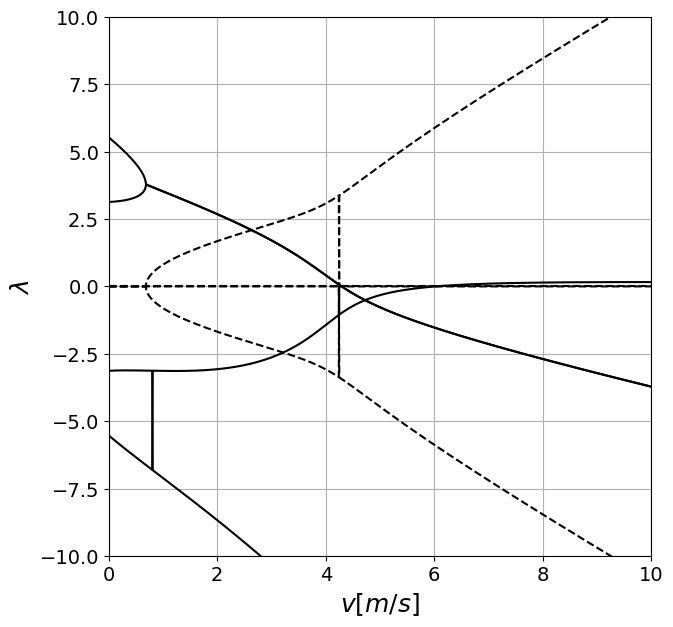

In [30]:
Vx = np.arange(0, 11, 0.01)
def compute_eigenvalues(M, C, K0, K2, Vx):
    n = M.shape[0]
    eigenvalues = []
    eig_real = []
    eig_imag = []

    for v in Vx:
        # Construct the A and B matrices for the generalized eigenvalue problem
        A = np.block([[np.zeros((n, n)), np.eye(n)], 
                      [-np.linalg.inv(M) @ (K0*g + K2 * v**2), -np.linalg.inv(M) @ (v * C)]])
        B = np.block([[np.eye(n), np.zeros((n, n))],
                      [np.zeros((n, n)), np.eye(n)]])

        # Solve the eigenvalue problem
        vals, _ = np.linalg.eig(np.dot(np.linalg.inv(B), A))

        # Store real and imaginary parts of the eigenvalues
        eigenvalues.append(vals)
        eig_real.append(vals.real)
        eig_imag.append(vals.imag)

    return np.array(eigenvalues), np.array(eig_real), np.array(eig_imag)

# Compute eigenvalues
eigenvalues, eig_real, eig_imag = compute_eigenvalues(M, C, K0, K2, Vx)

# Print eigenvalues for the first few v values as an example
for i, v in enumerate(Vx[:]):
    print(f"Eigenvalues for v={v}: {eigenvalues[i]}")

# Plot eigenvalues
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(7,7))
for i in range(len(eigenvalues[0])):
    plt.plot(Vx, eig_real[:, i],  label=f'Real', color = 'black')
    plt.plot(Vx, eig_imag[:, i], label=f'Imaginary', linestyle='--', color = 'black')


black_real = mlines.Line2D([], [], color = 'black', label = r'Re($\lambda$)')
black_imag = mlines.Line2D([], [], color = 'black', label = r'Im($\lambda$', linestyle = '--')
                           
plt.xlabel('$v [m/s]$', fontsize=18)
plt.ylabel('$\lambda$', fontsize=18)
plt.xlim([0, 10])
plt.ylim([-10, 10])
plt.tick_params(labelsize=14)
plt.grid()
plt.show()